http://criminalidad.inei.gob.pe

# Imports / load data

In [1]:
import os
os.chdir('..')
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np, pandas as pd, seaborn as sns, unidecode, math, rfpimp, altair as alt
import matplotlib.pyplot as plt
from pathlib import Path
from perustats import inei_series, plots
alt.renderers.enable('notebook')
%matplotlib inline

In [3]:
df = pd.read_csv('data/processed/criminality/vaw-endes.csv', low_memory=False)
df.head(2)

location                                           variable  year  value
0  Nacional  MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON A...  2009  0.236
1  Amazonas  MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON A...  2009  0.199

# Plots

In [174]:
col2abb = {
'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO': 'violencia fisica',
'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA PSICOLÓGICA Y/O VERBAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO': 'violencia psicologica',
'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA PSICOLÓGICA, FÍSCA Y/O SEXUAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO': 'violencia',
'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA SEXUAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO': 'violencia sexual',
'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Herida o lesión, hueso o dientes rotos, quemaduras': 'consecuencias graves',
'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Moretones y dolores': 'consecuencias moretones',
'MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON AYUDA  EN PERSONAS CERCANAS CUANDO FUERON MALTRATADAS FÍSICAMENTE': 'ayuda personas',
'MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON AYUDA EN ALGUNA INSTITUCIÓN CUANDO FUERON MALTRATADAS FÍSICAMENTE': 'ayuda institucion',
'MUJERES DE 15 A 49 AÑOS DE EDAD QUE SUFRIERON VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR OTRA PERSONA, APARTE DE SU ACTUAL/ÚLTIMO ESPOSO OCOMPAÑERO': 'violencia fisica no pareja',
}
abb2col = {v:k for k,v in col2abb.items()}
dff = df[(df.location != 'Nacional') & (df.year != '2017(I sem)')].reset_index(drop=True)
dff.variable = dff.variable.apply(lambda x: col2abb[x])
dff.head(2)

location           variable  year  value
0  Amazonas  ayuda institucion  2009  0.199
1    Áncash  ayuda institucion  2009  0.252

## Timelines

In [191]:
dff.variable.unique()

array(['ayuda institucion', 'violencia sexual', 'ayuda personas',
       'violencia', 'consecuencias moretones', 'consecuencias graves',
       'violencia psicologica', 'violencia fisica',
       'violencia fisica no pareja'], dtype=object)

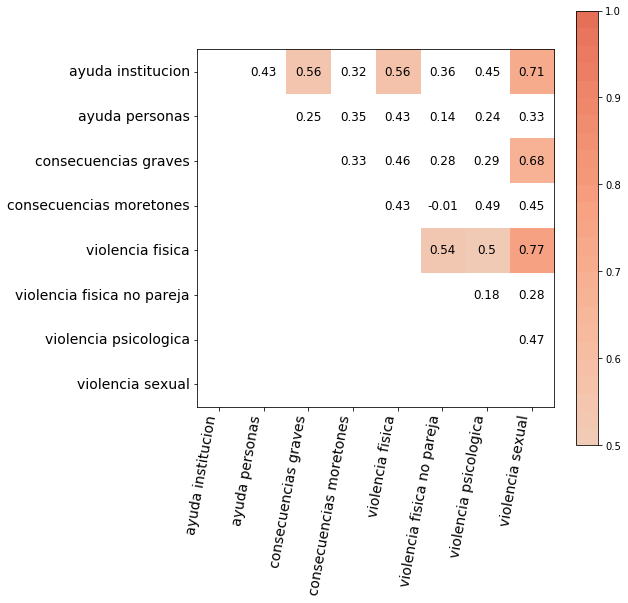

In [198]:
v = [
'ayuda institucion', 'ayuda personas',
# 'violencia',
'violencia sexual',
'consecuencias moretones', 'consecuencias graves',
'violencia psicologica', 'violencia fisica',
'violencia fisica no pareja'
]
rfpimp.plot_corr_heatmap(dff[(dff.year == '2016') & (dff.variable.isin(v))].
                             set_index(['location', 'variable'])['value'].unstack(),
                         threshold=0.5, figsize=(8,8))

ayuda institucion:


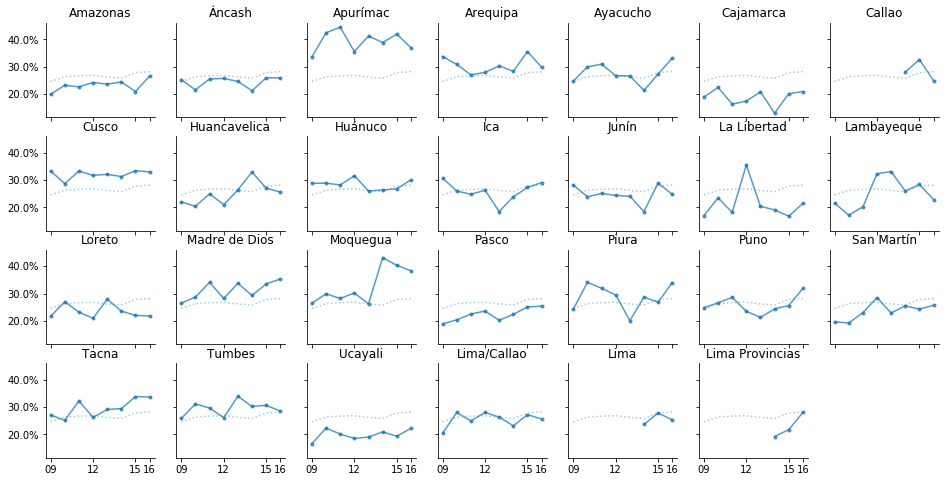

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
violencia sexual:


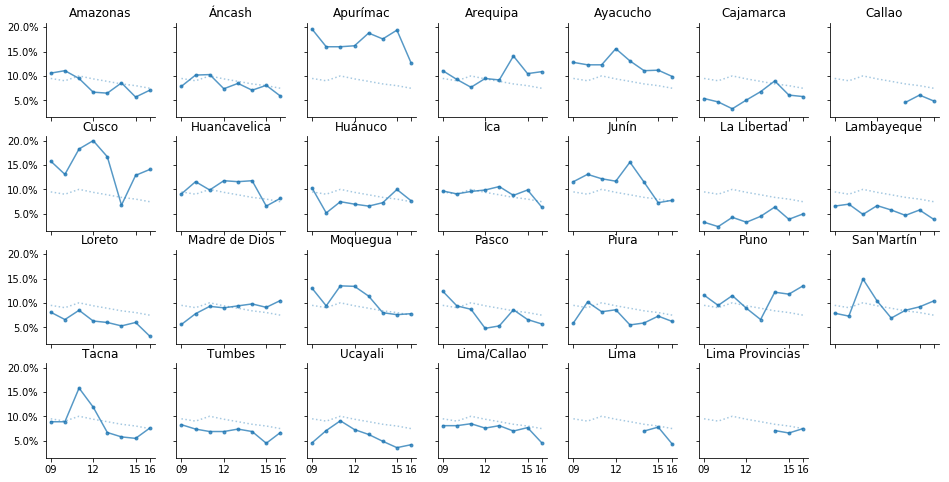

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
ayuda personas:


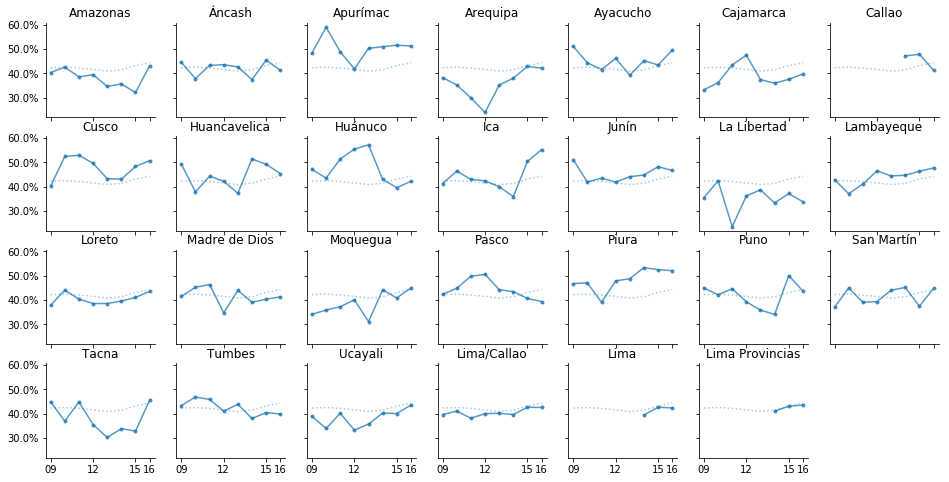

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
violencia:


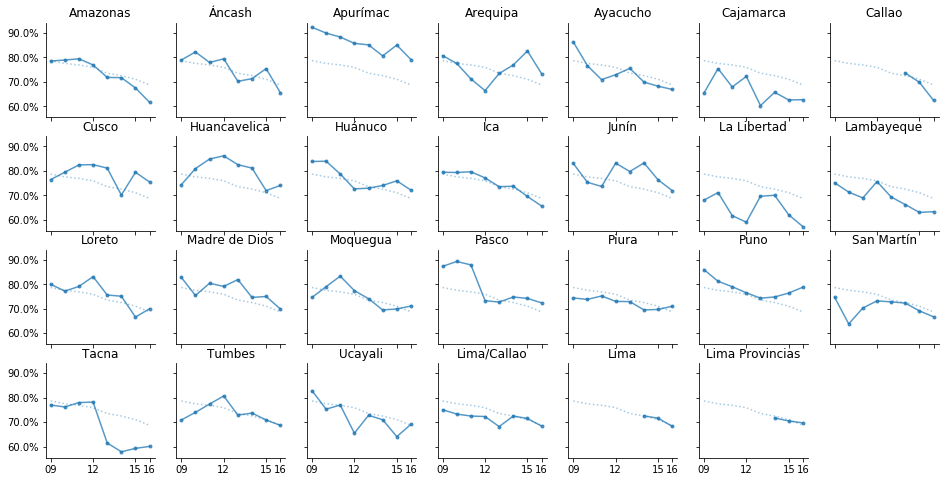

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
consecuencias moretones:


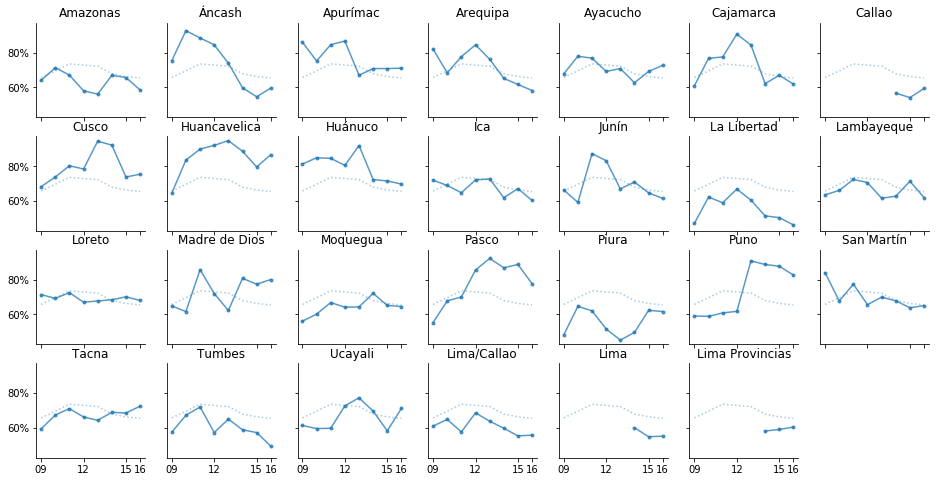

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
consecuencias graves:


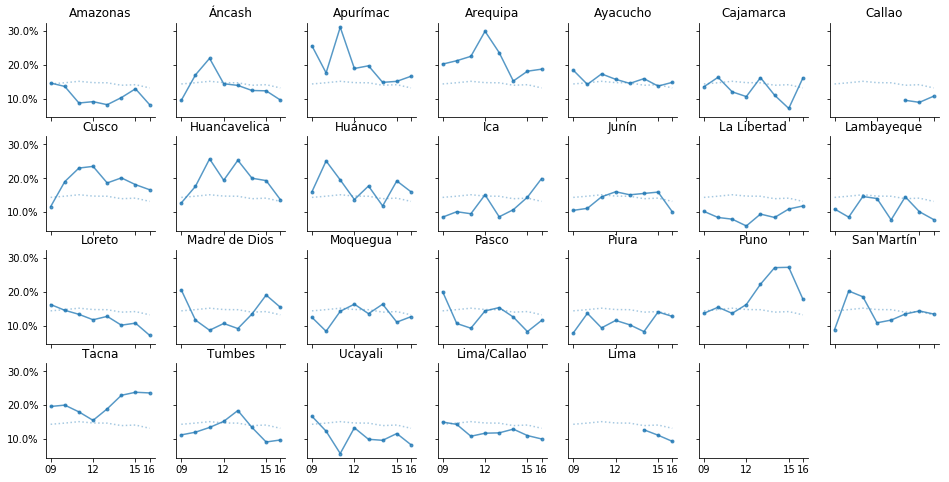

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
violencia psicologica:


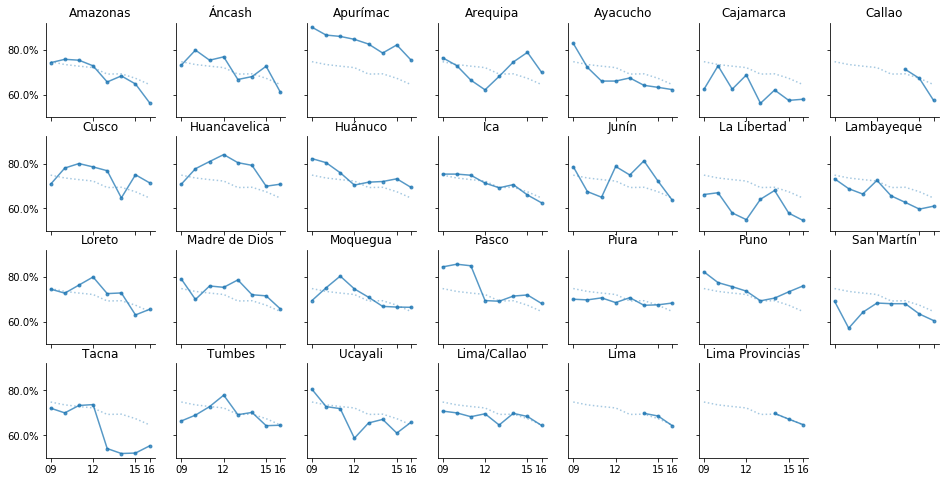

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
violencia fisica:


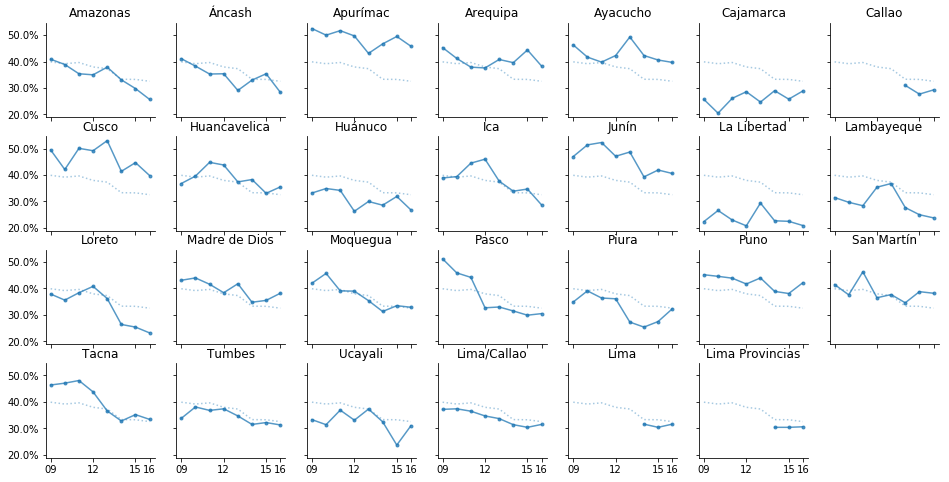

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
violencia fisica no pareja:


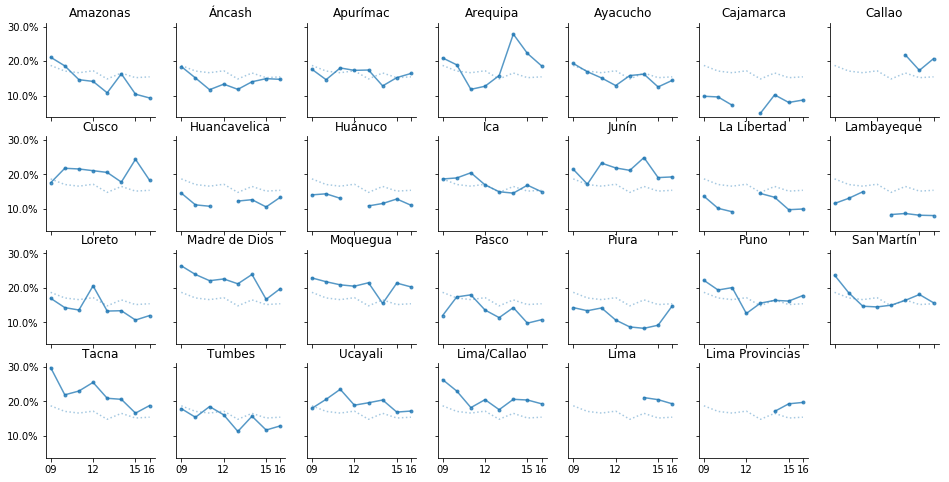

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


In [49]:
for v in dff.variable.unique():
    plots.timeline_grid(dff, 'value', 'year', 'location', 'variable', v, title=v,
                        cols=7, fs=(16,8), percentage=True)


In [108]:
dff.variable.unique()

array(['ayuda institucion', 'violencia sexual', 'ayuda personas',
       'violencia', 'consecuencias moretones', 'consecuencias graves',
       'violencia psicologica', 'violencia fisica',
       'violencia fisica no pareja'], dtype=object)

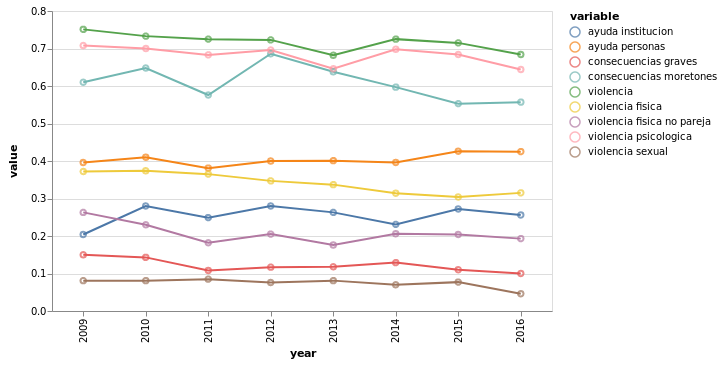

In [175]:
chart = alt.Chart(dff.query('location == "Lima/Callao"')).mark_line().encode(
    x='year:O', y='value:Q', color='variable'
).properties(
    width=500
)
chart.interactive() + chart.mark_point()

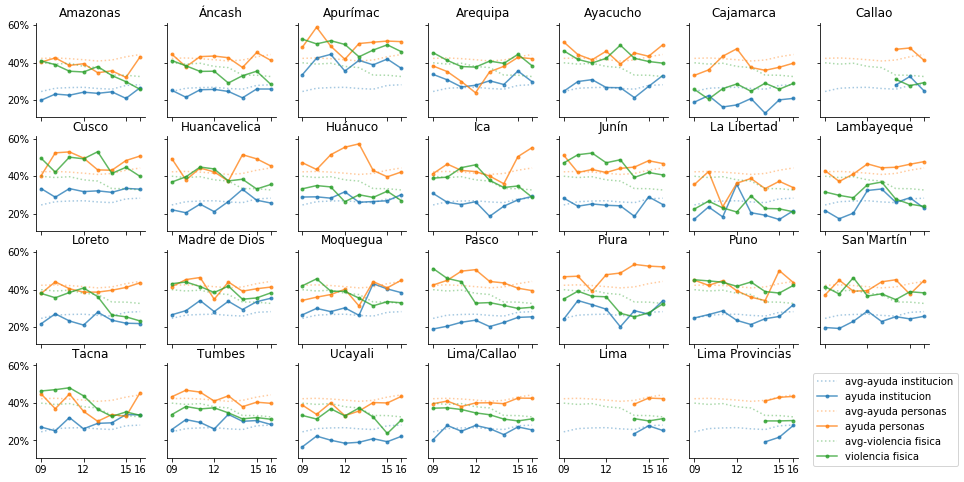

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


In [177]:
plots.timeline_grid(dff, 'value', 'year', 'location', 'variable',
                    [
                        'ayuda institucion',
                        'ayuda personas',
                        'violencia fisica'
                    ],
                    cols=7, percentage=True, legend=True, fs=(16,8),
                    legend_bbox=(1.8, 0.9), legend_loc='upper center');

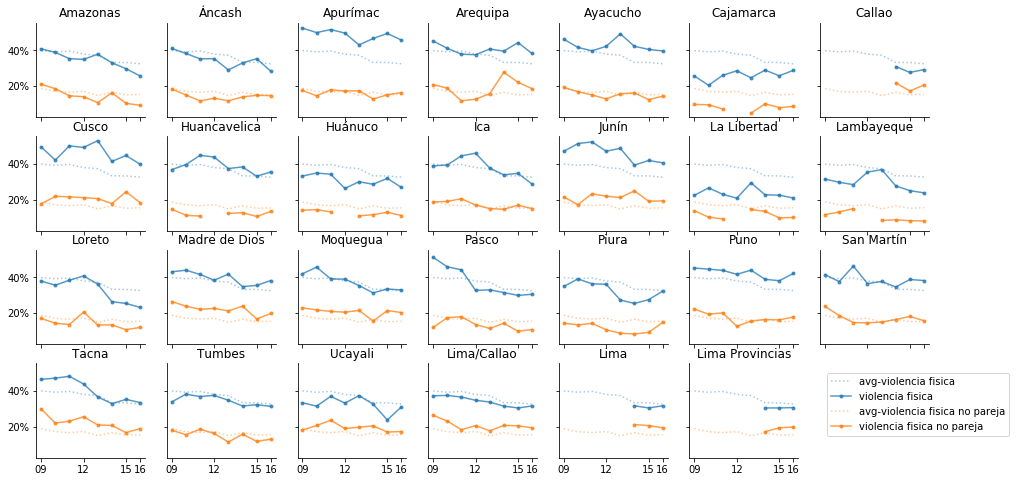

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


In [158]:
plots.timeline_grid(dff, 'value', 'year', 'location', 'variable',
                    [
                        'violencia fisica',
                        'violencia fisica no pareja'
                    ],
                    cols=7, percentage=True, legend=True, fs=(16,8),
                    legend_bbox=(2.1, 0.9), legend_loc='upper center');

## Interactive plots

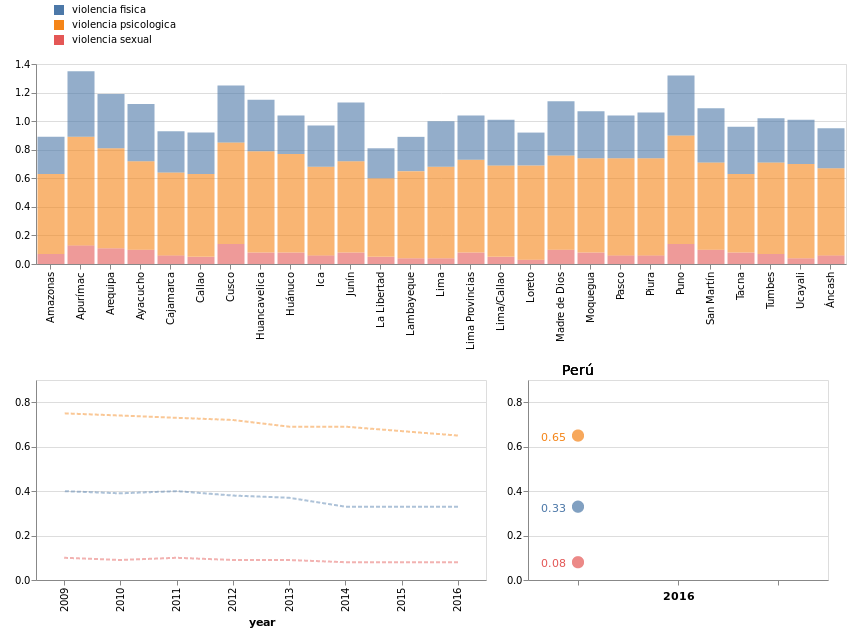

In [221]:
v = [
#     'ayuda institucion', 'ayuda personas',
    # 'violencia',
    'violencia sexual',
#     'consecuencias moretones', 'consecuencias graves',
    'violencia psicologica',
    'violencia fisica',
#     'violencia fisica no pareja'
]
plots.tl_summary(dff[dff.variable.isin(v)], values='value', time='year', bars='location',
                 col='variable', text='', slope_avg='Perú')

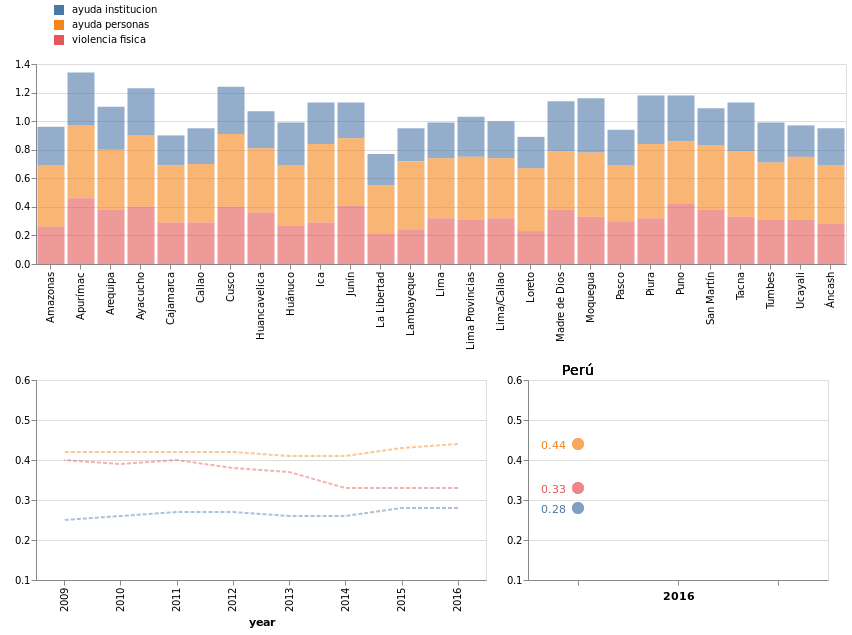

In [206]:
v = [
    'ayuda institucion', 'ayuda personas',
    'violencia fisica',
]
plots.tl_summary(dff[dff.variable.isin(v)], values='value', time='year', bars='location',
                 col='variable', text='', slope_avg='Perú')

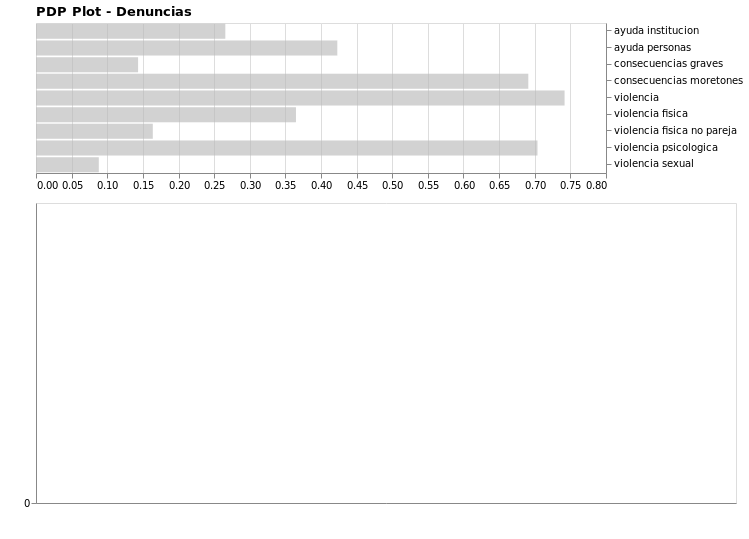

In [277]:
plots.pdp_explore(dff, rows='location', columns='year', values='value', cluster_centers=3,
                  variables='variable', title='PDP Plot - Denuncias', bars_h=150, height=300)

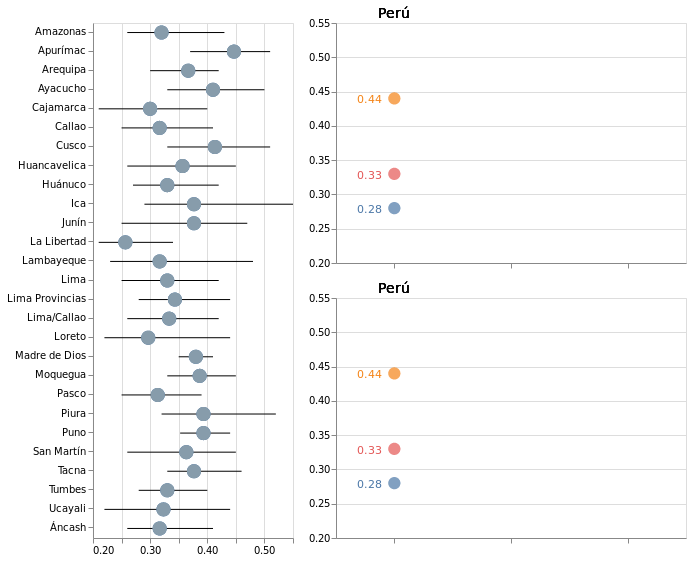

In [217]:
plots.slope_comparison(dff[dff.variable.isin(v)].query('year == "2016"'), values='value', bars='location',
                       col='variable', text='', slope_avg='Perú', slope_y_title='')